In [3]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


# 1) 


In [4]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=17
Period for indexes: 1954-04-17 to 2024-04-17 


In [5]:
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)
gdpc1.head()

,GDPC1
DATE,
1954-07-01,2880.482
1954-10-01,2936.852
1955-01-01,3020.746
1955-04-01,3069.910
1955-07-01,3111.379


In [7]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
# gdpc1['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdpc1.tail()
value = round(gdpc1['gdpc1_us_yoy'][-1]*100,1)
print(f'The YoY growth is {value}%')

The YoY growth is 3.1%


# 2) 

In [8]:
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.head()
dgs10 = dgs10.reset_index()

dgs10.head()


,DATE,DGS10
0,1962-01-02,4.06
1,1962-01-03,4.03
2,1962-01-04,3.99
3,1962-01-05,4.02
4,1962-01-08,4.03


In [9]:
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs2.head()

,DGS2
DATE,
1976-06-01,7.26
1976-06-02,7.23
1976-06-03,7.22
1976-06-04,7.12
1976-06-07,7.09


In [13]:
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
merged_df = pd.merge(dgs2, dgs10, on='DATE', how='inner')
merged_df = merged_df.reset_index()
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
yr2000onwards = merged_df[merged_df['DATE'].dt.year >= 2000]
yr2000onwards['Diff'] = yr2000onwards['DGS10']- yr2000onwards['DGS2']
yr2000onwards['Diff'].describe()
print(f"The min value is {round(yr2000onwards['Diff'].min(),1)}")

The min value is -1.1


C:\Users\Eugene\AppData\Local\Temp\ipykernel_22124\960155264.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr2000onwards['Diff'] = yr2000onwards['DGS10']- yr2000onwards['DGS2']


## 3) 

In [51]:
import yfinance as yf
import pandas as pd

# Download historical daily index prices for S&P 500 (^GSPC) and IPC Mexico (^MXX)
start_date = '2019-04-09'
end_date = '2024-04-09'

gspc = yf.download('^GSPC', start=start_date, end=end_date)
mxx = yf.download('^MXX', start=start_date, end=end_date)

gspc.head()
# Calculate growth ratio for each index
gspc_growth_ratio = gspc['Adj Close'][-1] / gspc['Adj Close'][0]
mxx_growth_ratio = mxx['Adj Close'][-1] / mxx['Adj Close'][0]

# Select the higher growing index
if gspc_growth_ratio > mxx_growth_ratio:
    higher_growing_index = '^GSPC'
    growth_percentage = round((gspc_growth_ratio - 1) * 100)
else:
    higher_growing_index = '^MXX'
    growth_percentage = round((mxx_growth_ratio - 1) * 100)

# Print the growth percentage
print(f"The higher growing index is {higher_growing_index} with a growth of {growth_percentage}%.")


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed

The higher growing index is ^GSPC with a growth of 81%.


## 4)


In [17]:
import yfinance as yf

# Define the list of stock tickers
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Create an empty dictionary to store the range ratios for each stock
range_ratios = {}

# Loop through each stock ticker
for stock in stocks:
    # Download 2023 daily OHLCV data for the current stock
    data = yf.download(stock, start='2023-01-01', end='2023-12-31')
    
    # Calculate the maximum and minimum Adj. Close prices for the current stock
    max_price = data['Adj Close'].max()
    min_price = data['Adj Close'].min()
    
    # Calculate the range ratio for the current stock
    range_ratio = (max_price - min_price) / max_price
    
    # Store the range ratio for the current stock in the dictionary
    range_ratios[stock] = round(range_ratio, 2)


# Find the stock with the largest range ratio
print(range_ratios)
largest_range_stock = max(range_ratios, key=range_ratios.get)
largest_range_ratio = range_ratios[largest_range_stock]

print(f"The stock with the largest range ratio in 2023 is {largest_range_stock} with a ratio of {largest_range_ratio}.")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

{'2222.SR': 0.21, 'BRK-B': 0.21, 'AAPL': 0.37, 'MSFT': 0.42, 'GOOG': 0.39, 'JPM': 0.28}
The stock with the largest range ratio in 2023 is MSFT with a ratio of 0.42.


## 5)

In [18]:
import yfinance as yf

# Define the list of stock tickers
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Create an empty dictionary to store the total dividends and last closing prices for each stock
dividendss = {}
closing_prices = {}

# Loop through each stock ticker
for stock in stocks:
    # Download all dividends paid in 2023 for the current stock
    data = yf.Ticker(stock)
    dividends = data.get_actions()
    # print(dividends.index)
    # print(dividends.index.year)
    dividends_since_2023 = dividends[dividends.index.year == 2023 ]
    total_dividends_since_2023 = dividends_since_2023['Dividends'].sum()
    print (total_dividends_since_2023)
    dividendss[stock] = total_dividends_since_2023
    
    # Get the closing price (Adj. Close) at the last trading day of the year for the current stock
    last_day_data = yf.download(stock, start='2023-12-01', end='2023-12-31')
    print(stock)
    # print(last_day_data)
    print(last_day_data['Close'][-1])
    closing_prices[stock] = last_day_data['Close'][-1]

print(dividendss)
# Calculate the dividend yield for each stock
dividend_yields = {stock: (dividendss[stock] / closing_prices[stock]) * 100 for stock in stocks}

# Find the maximum dividend yield among all stocks
max_dividend_yield_stock = max(dividend_yields, key=dividend_yields.get)
max_dividend_yield = round(dividend_yields[max_dividend_yield_stock], 1)

print(f"The stock with the largest dividend yield in 2023 is {max_dividend_yield_stock} with a yield of {max_dividend_yield}%.")

[*********************100%%**********************]  1 of 1 completed

0.9107640000000001
2222.SR
33.04999923706055



[*********************100%%**********************]  1 of 1 completed

0.0
BRK-B
356.6600036621094



[*********************100%%**********************]  1 of 1 completed

0.95
AAPL
192.52999877929688



[*********************100%%**********************]  1 of 1 completed

2.79
MSFT
376.0400085449219



[*********************100%%**********************]  1 of 1 completed

0.0
GOOG
140.92999267578125



[*********************100%%**********************]  1 of 1 completed

4.05
JPM
170.10000610351562
{'2222.SR': 0.9107640000000001, 'BRK-B': 0.0, 'AAPL': 0.95, 'MSFT': 2.79, 'GOOG': 0.0, 'JPM': 4.05}
The stock with the largest dividend yield in 2023 is 2222.SR with a yield of 2.8%.


## 6)

[*********************100%%**********************]  9 of 9 completed


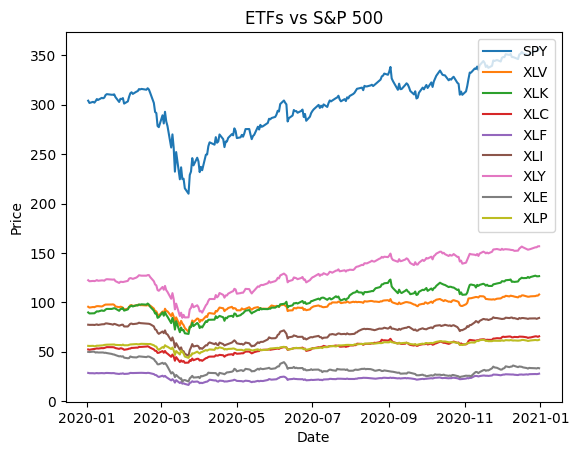

In [31]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define a list of ETF tickers along with the S&P 500 ticker
tickers = ['SPY', 'XLV', 'XLK', 'XLC','XLF','XLI','XLY','XLE','XLP']  # Example ETFs representing the S&P 500

# Download historical data for each ticker
data = yf.download(tickers, start='2020-01-01', end='2021-01-01', group_by='ticker')

# Plot the Adj Close prices for each ticker
for ticker in tickers:
    plt.plot(data[ticker]['Adj Close'], label=ticker)

# Plot S&P 500 as a reference
# plt.plot(data['SPY']['Adj Close'], label='SPY', linestyle='--', color='black')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ETFs vs S&P 500')
plt.legend()

# Show plot
plt.show()


## 7)

Perhaps to look at the sector of the stocks with positive earnings and find the stocks in the sector that has upcoming earning